In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

In [2]:
#. https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

In [3]:
df=pd.read_csv('/Users/julialintern/Downloads/heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


### 1)  Basic Preprocessing

In [4]:
### Basic Preprocessing : 

df_clean=df.copy()

for col in ['HeartDisease','Smoking','Stroke','AlcoholDrinking','DiffWalking','Diabetic','PhysicalActivity','Asthma','KidneyDisease','SkinCancer']:
    df_clean[col]=df_clean[col].apply(lambda x: 1 if x=='Yes' else 0)

In [5]:
df_clean['Sex']=df_clean.Sex.apply(lambda x: 1 if x=='Male' else 0)

In [6]:
df_clean.AgeCategory.value_counts()

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

In [7]:
df_clean.AgeCategory=df_clean.AgeCategory.apply(lambda x :x.split('-')[0].split(' ')[0]).astype(int)

In [8]:
df_clean.AgeCategory.value_counts()

65    34151
60    33686
70    31065
55    29757
50    25382
80    24153
45    21791
75    21482
18    21064
40    21006
35    20550
30    18753
25    16955
Name: AgeCategory, dtype: int64

In [9]:
df_clean.HeartDisease.value_counts()

0    292422
1     27373
Name: HeartDisease, dtype: int64

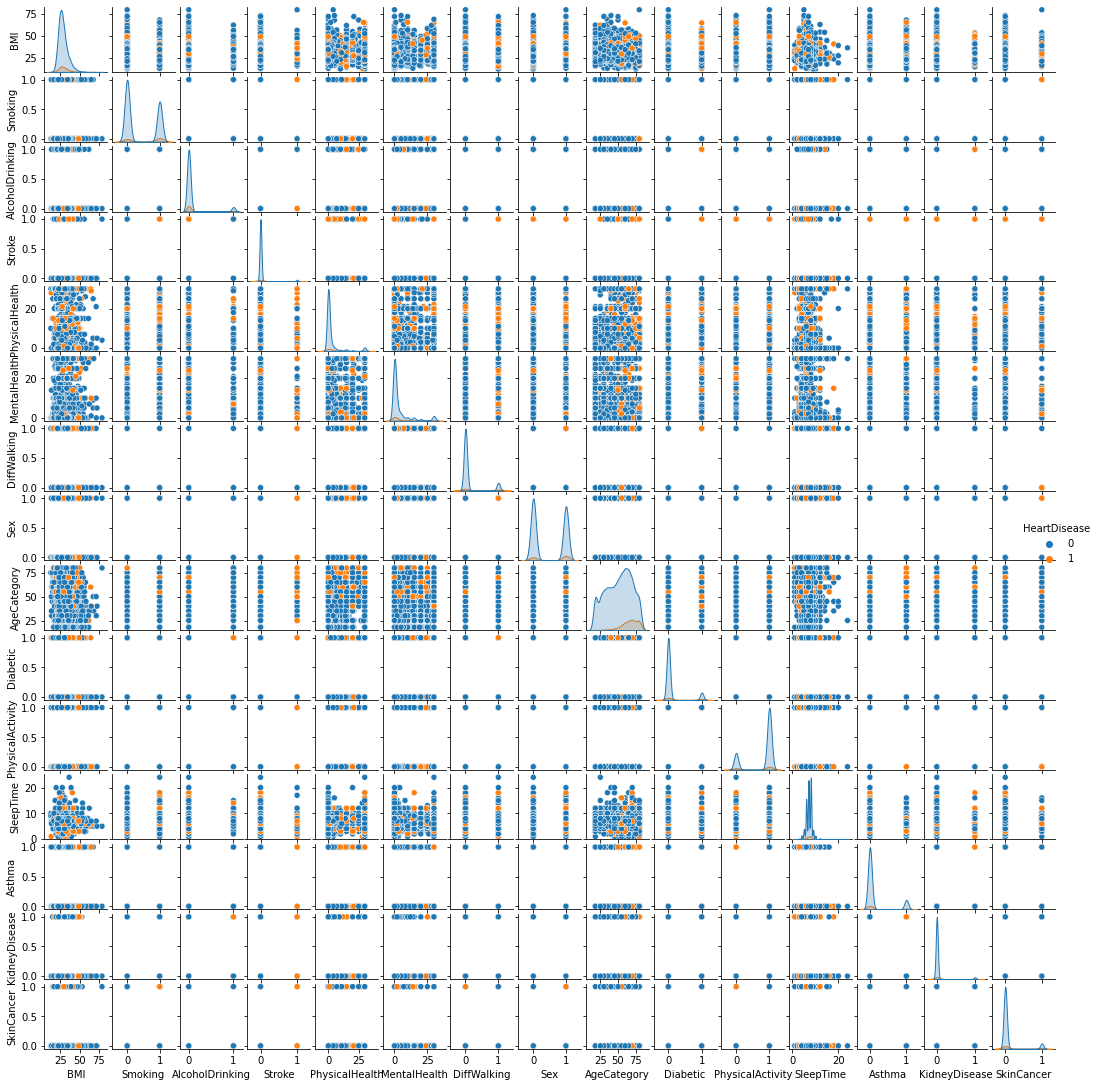

In [10]:
# Warning: 
df_samp=df_clean.sample(10000)
g=sns.pairplot(df_samp, hue='HeartDisease');
g.fig.set_size_inches(15,15)

In [11]:
### Develop a Baseline model via Logistic Regression

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [13]:
df_clean.dtypes

HeartDisease          int64
BMI                 float64
Smoking               int64
AlcoholDrinking       int64
Stroke                int64
PhysicalHealth      float64
MentalHealth        float64
DiffWalking           int64
Sex                   int64
AgeCategory           int64
Race                 object
Diabetic              int64
PhysicalActivity      int64
GenHealth            object
SleepTime           float64
Asthma                int64
KidneyDisease         int64
SkinCancer            int64
dtype: object

In [14]:
df_num=df_clean.drop(['GenHealth','Race'],1)

/var/folders/jn/625fnnbs1jg77y82ld96q65w0000gn/T/ipykernel_1412/331177569.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_num=df_clean.drop(['GenHealth','Race'],1)


In [15]:
X=df_num.drop(columns=['HeartDisease'],axis=1)
y=df_num.HeartDisease 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

clf=LogisticRegression(max_iter=1000).fit(X_train,y_train)
probas=clf.predict_proba(X_test)[:,1]
print('ROC AUC Score: {:6.3f}'.format(roc_auc_score(y_test,probas)))

ROC AUC Score:  0.826


In [16]:
### DESCRIPTION OF ROC AUC CURVE

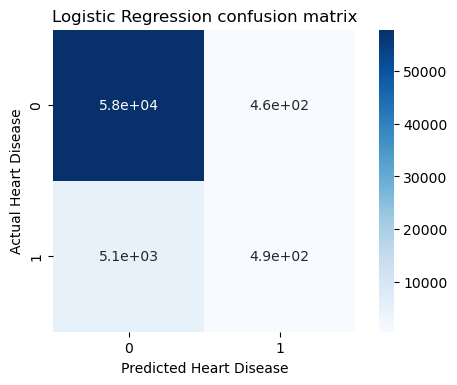

In [17]:
### Confusion Matrix

#print("Logistic Regression confusion matrix: \n\n", confusion_matrix(y_test, clf.predict(X_test)))

logtistic_confusion = confusion_matrix(y_test, clf.predict(X_test))
plt.figure(dpi=100)
sns.heatmap(logtistic_confusion, cmap=plt.cm.Blues, annot=True, square=True,
           xticklabels=clf.classes_,
           yticklabels=clf.classes_)

plt.xlabel('Predicted Heart Disease')
plt.ylabel('Actual Heart Disease')
plt.title('Logistic Regression confusion matrix');

In [18]:
# ok, High number of False Negatives (not good)

In [19]:
feat_df=pd.DataFrame({'coef':clf.coef_[0],'features':X.columns,'abs_val_coef':np.abs(clf.coef_[0])}).sort_values(by='abs_val_coef')
feat_df.tail(10)

,coef,features,abs_val_coef
10,-0.090895,PhysicalActivity,0.090895
14,0.133488,SkinCancer,0.133488
2,-0.281081,AlcoholDrinking,0.281081
12,0.339149,Asthma,0.339149
6,0.414396,DiffWalking,0.414396
1,0.445738,Smoking,0.445738
9,0.625458,Diabetic,0.625458
13,0.682569,KidneyDisease,0.682569
7,0.737813,Sex,0.737813
3,1.130262,Stroke,1.130262


In [20]:
### Step 2 ADD IN CATEGORICALS

In [21]:
df_clean.dtypes

HeartDisease          int64
BMI                 float64
Smoking               int64
AlcoholDrinking       int64
Stroke                int64
PhysicalHealth      float64
MentalHealth        float64
DiffWalking           int64
Sex                   int64
AgeCategory           int64
Race                 object
Diabetic              int64
PhysicalActivity      int64
GenHealth            object
SleepTime           float64
Asthma                int64
KidneyDisease         int64
SkinCancer            int64
dtype: object

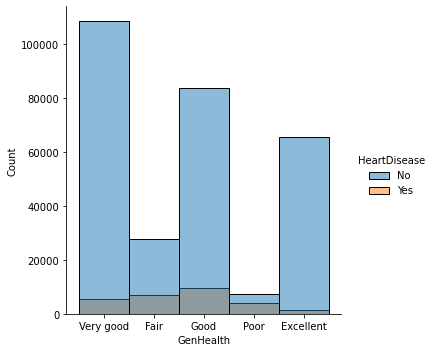

In [22]:
sns.displot(df[['HeartDisease','GenHealth']],x='GenHealth',hue='HeartDisease',bins=15)

In [23]:
df_comb=df_num.join(df_clean[['GenHealth']])

health_map={'Poor':1,'Fair':2,'Good':3,'Very good':4,'Excellent':5}
df_comb.GenHealth=df_comb.GenHealth.map(health_map)

df_comb.GenHealth.value_counts(dropna=False)

4    113858
3     93129
5     66842
2     34677
1     11289
Name: GenHealth, dtype: int64

In [24]:
df_num.dtypes


HeartDisease          int64
BMI                 float64
Smoking               int64
AlcoholDrinking       int64
Stroke                int64
PhysicalHealth      float64
MentalHealth        float64
DiffWalking           int64
Sex                   int64
AgeCategory           int64
Diabetic              int64
PhysicalActivity      int64
SleepTime           float64
Asthma                int64
KidneyDisease         int64
SkinCancer            int64
dtype: object

In [25]:
df_num.AgeCategory.value_counts()

65    34151
60    33686
70    31065
55    29757
50    25382
80    24153
45    21791
75    21482
18    21064
40    21006
35    20550
30    18753
25    16955
Name: AgeCategory, dtype: int64

Text(0.5, 1.0, 'resprate means vs count ratio')

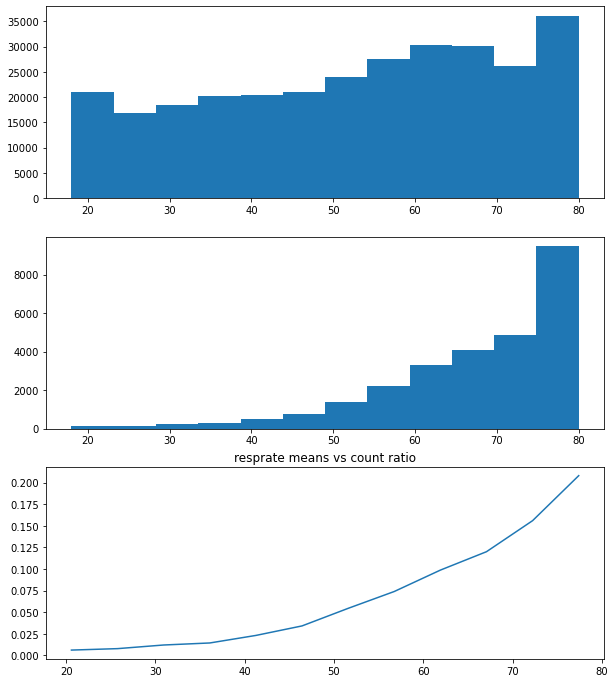

In [26]:
fig, ax = plt.subplots(3, 1, figsize=(10, 12))  # 3 Rows, 1 Col

count0, bins_0, _ = ax[0].hist(df_num.loc[(df_num.HeartDisease==0),'AgeCategory'], bins=12)
count1, bins_1, _ = ax[1].hist(df_num.loc[(df_num.HeartDisease==1),'AgeCategory'], bins=12)
ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0))
plt.title('resprate means vs count ratio')

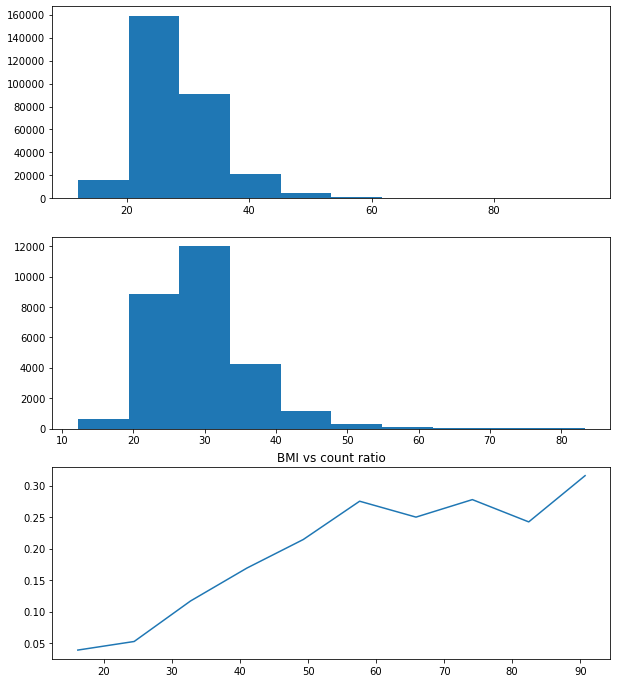

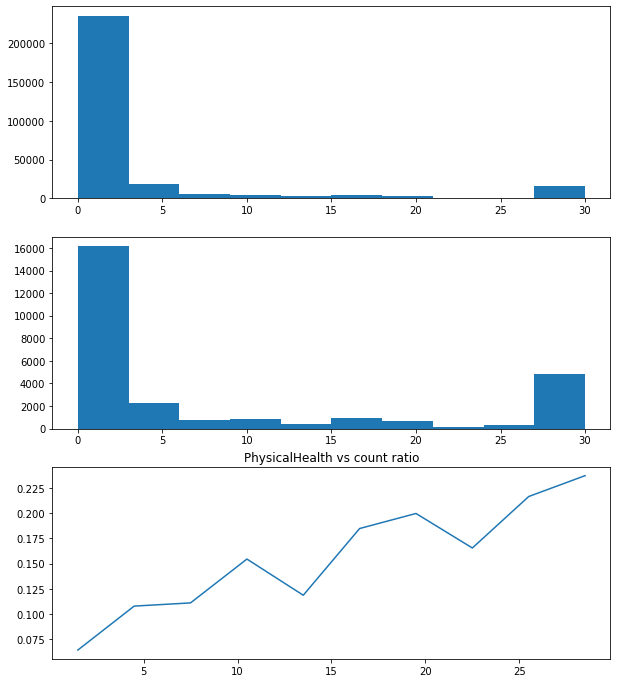

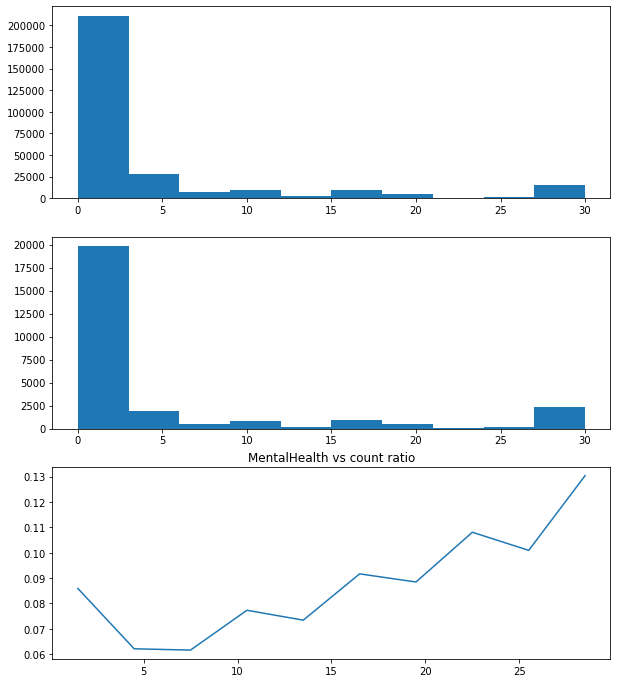

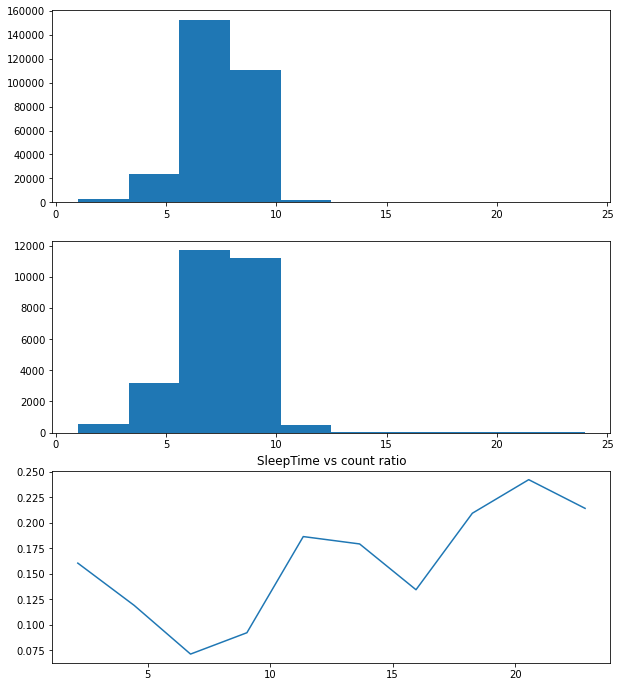

In [27]:
# #
for i in ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']:
    fig, ax = plt.subplots(3, 1, figsize=(10, 12))  # 3 Rows, 1 Col

    count0, bins_0, _ = ax[0].hist(df_num.loc[(df_num.HeartDisease==0),i])
    count1, bins_1, _ = ax[1].hist(df_num.loc[(df_num.HeartDisease==1),i])
    ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0))
    plt.title(i +' vs count ratio')

In [28]:
def sleep_map(x):
    if x >= 6 and x< 9:
        return 'six_eight'
    elif x >=9:
        return 'over_eight'
    else:
        return 'less_than_six'

In [29]:
df_comb['sleep_cats']=df_comb.SleepTime.apply(sleep_map)
sleep_dummies=pd.get_dummies(df_comb['sleep_cats'],drop_first=True)
df_comb=df_comb.join(sleep_dummies)

In [30]:
df_comb['sleep_cats'].value_counts()

six_eight        262074
less_than_six     30265
over_eight        27456
Name: sleep_cats, dtype: int64

In [31]:
# Test GeneralHealth

X=df_comb.drop(columns=['HeartDisease','SleepTime','sleep_cats'],axis=1)
y=df_comb.HeartDisease 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

clf=LogisticRegression(max_iter=1000).fit(X_train,y_train)
probas=clf.predict_proba(X_test)[:,1]
print('ROC AUC Score: {:6.3f}'.format(roc_auc_score(y_test,probas)))

ROC AUC Score:  0.836


In [32]:
df_comb=df_comb.join(df[['Race']])

In [33]:
# Race categorical 
df_comb.Race=df_comb.Race.str.replace('Other','Aa_other')
race_dummies = pd.get_dummies(df_comb.Race,drop_first=True)
df_comb=df_comb.join(race_dummies)

In [34]:
df_comb.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Diabetic', 'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'GenHealth', 'sleep_cats', 'over_eight', 'six_eight',
       'Race', 'American Indian/Alaskan Native', 'Asian', 'Black', 'Hispanic',
       'White'],
      dtype='object')

In [35]:

X=df_comb.drop(columns=['HeartDisease','over_eight','six_eight','sleep_cats','Race'],axis=1)
y=df_comb.HeartDisease 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

clf=LogisticRegression(max_iter=1000).fit(X_train,y_train)
probas=clf.predict_proba(X_test)[:,1]
print('ROC AUC Score: {:6.3f}'.format(roc_auc_score(y_test,probas)))

ROC AUC Score:  0.837


In [36]:
### OPEN : add Weight Balance

In [37]:
feat_df=pd.DataFrame({'coef':clf.coef_[0],'features':X.columns,'abs_val_coef':np.abs(clf.coef_[0])}).sort_values(by='abs_val_coef')
feat_df.tail(10)

,coef,features,abs_val_coef
2,-0.235536,AlcoholDrinking,0.235536
18,-0.249391,Black,0.249391
12,0.264910,Asthma,0.264910
1,0.357604,Smoking,0.357604
17,-0.418848,Asian,0.418848
9,0.490428,Diabetic,0.490428
15,-0.508877,GenHealth,0.508877
13,0.563808,KidneyDisease,0.563808
7,0.723439,Sex,0.723439
3,1.030284,Stroke,1.030284


In [38]:
## Add Class Balance

In [39]:
clf=LogisticRegression(max_iter=1000,class_weight='balanced').fit(X_train,y_train)
probas=clf.predict_proba(X_test)[:,1]
print('ROC AUC Score: {:6.3f}'.format(roc_auc_score(y_test,probas)))

ROC AUC Score:  0.837


In [40]:
## Grid Search & Pipeline 

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [42]:
# Note, that with this code : we are performing the train, val, test split :

In [43]:
np.logspace(-7,7,10)

array([1.00000000e-07, 3.59381366e-06, 1.29154967e-04, 4.64158883e-03,
       1.66810054e-01, 5.99484250e+00, 2.15443469e+02, 7.74263683e+03,
       2.78255940e+05, 1.00000000e+07])

In [44]:
params= {'C': np.logspace(-3,3,7),'class_weight':[{0:1,1:1},{0:1,1:2},{0:1,1:3},{0:1,1:4}]}

model_name = "lr_model"
model_log="_lr"

Grid=GridSearchCV(estimator=clf, param_grid=params, scoring='roc_auc',
                  n_jobs=-1, cv=3, verbose=3)
model = Pipeline([
    ('scaling', StandardScaler()), 
    ('classification', Grid)
]).fit(X_train,y_train)


globals()['Grid%s' % model_log]=pd.DataFrame(Grid.cv_results_)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


In [45]:
Grid_lr.sort_values(by='mean_test_score').tail()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
7,0.304162,0.059209,0.044716,0.014727,0.01,"{0: 1, 1: 4}","{'C': 0.01, 'class_weight': {0: 1, 1: 4}}",0.841646,0.841868,0.841798,0.841771,0.000093,5
0,0.715093,0.015646,0.046556,0.007986,0.001,"{0: 1, 1: 1}","{'C': 0.001, 'class_weight': {0: 1, 1: 1}}",0.841811,0.841696,0.841814,0.841774,0.000055,4
1,0.745392,0.011168,0.051207,0.007603,0.001,"{0: 1, 1: 2}","{'C': 0.001, 'class_weight': {0: 1, 1: 2}}",0.841826,0.841859,0.841904,0.841863,0.000032,3
2,0.537906,0.250505,0.042699,0.017644,0.001,"{0: 1, 1: 3}","{'C': 0.001, 'class_weight': {0: 1, 1: 3}}",0.841811,0.841900,0.841936,0.841882,0.000052,2
3,0.187040,0.001725,0.022174,0.000988,0.001,"{0: 1, 1: 4}","{'C': 0.001, 'class_weight': {0: 1, 1: 4}}",0.841802,0.841923,0.841955,0.841894,0.000066,1


In [46]:
# could be worthwhile to repeat? . .

### Tree-Based Models

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn import tree

In [48]:
dt = DecisionTreeClassifier(max_depth=2,criterion="entropy")
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

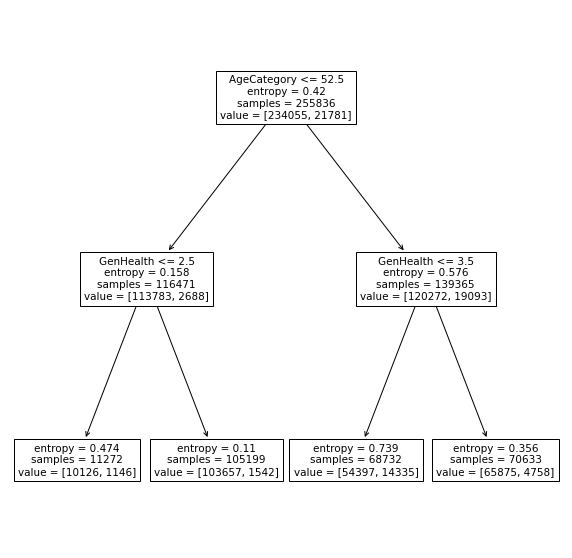

In [49]:
plt.figure(figsize=(10,10))
tree.plot_tree(dt,feature_names=X_train.columns,);

In [50]:
def testing_models(clf): 
    clf.fit(X_train,y_train)
    probas=clf.predict_proba(X_train)[:,1]
    print('Train ROC: {:6.3f}'.format(roc_auc_score(y_train,probas)))
    probas=clf.predict_proba(X_test)[:,1]
    print('Test ROC: {:6.3f}'.format(roc_auc_score(y_test,probas)))

In [51]:
clf=DecisionTreeClassifier(max_depth=2,criterion="entropy",class_weight='balanced')
testing_models(clf)

Train ROC:  0.764
Test ROC:  0.761


In [52]:
clf=DecisionTreeClassifier(max_depth=5,criterion="entropy",class_weight='balanced')
testing_models(clf)

Train ROC:  0.823
Test ROC:  0.818


In [53]:
### Random Forest 

clf=RandomForestClassifier(class_weight='balanced')
testing_models(clf)

Train ROC:  0.999
Test ROC:  0.786


In [54]:
## Lets get serious about Cross Val ! 

In [ ]:
### Warning: takes 5 mins to run? 

### GridSearch Models

lr_model = LogisticRegression(max_iter=1000,random_state=123)
dt_model = DecisionTreeClassifier(random_state=123)
rf_model = RandomForestClassifier(random_state=123)

params1= {'C': np.logspace(-3,3,7),'class_weight':[{0:1,1:2},{0:1,1:4},{0:1,1:6},{0:1,1:8}]}
params2={"max_depth": range(5,20,5), "min_samples_leaf": range(1,15,5),'class_weight':[{0:1,1:2},{0:1,1:4},{0:1,1:6},{0:1,1:8}]}
params3={"max_depth": range(5,20,5), "min_samples_leaf": range(1,15,5),
         "n_estimators":[200,400],'class_weight':[{0:1,1:2},{0:1,1:4},{0:1,1:6},{0:1,1:8}]}

model_names = ["lr_model", "dt_model", "rf_model"]
parameters_list=[params1, params2, params3]
model_log=["_lr","_dt", "_rf"]

scaler = StandardScaler()

for i in range(len(model_names)):
    Grid=GridSearchCV(estimator=eval(model_names[i]), param_grid=parameters_list[i], scoring='roc_auc',
                      n_jobs=-1, cv=3, verbose=3)
    
    if i == 'lr_model': 
        
        Pipeline(steps=[("scaler", scaler), ("pca", pca), ("logistic", logistic)])
        model = Pipeline([
            (("scaler", scaler), 
            ('classification', Grid))
        ]).fit(X_train,y_train)
        
    else: 
        model=Grid.fit(X_train,y_train)
        
    globals()['Grid%s' % model_log[i]]=pd.DataFrame(Grid.cv_results_)  

Fitting 3 folds for each of 28 candidates, totalling 84 fits
[CV 3/3] END C=0.001, class_weight={0: 1, 1: 1};, score=0.842 total time=   0.8s
[CV 3/3] END C=0.001, class_weight={0: 1, 1: 4};, score=0.842 total time=   0.2s
[CV 3/3] END .C=0.01, class_weight={0: 1, 1: 2};, score=0.842 total time=   0.3s
[CV 3/3] END ..C=0.1, class_weight={0: 1, 1: 1};, score=0.842 total time=   0.4s
[CV 2/3] END ..C=0.1, class_weight={0: 1, 1: 4};, score=0.842 total time=   0.5s
[CV 3/3] END ..C=1.0, class_weight={0: 1, 1: 2};, score=0.842 total time=   0.5s
[CV 2/3] END .C=10.0, class_weight={0: 1, 1: 1};, score=0.842 total time=   0.5s
[CV 1/3] END .C=10.0, class_weight={0: 1, 1: 4};, score=0.842 total time=   0.3s
[CV 3/3] END C=100.0, class_weight={0: 1, 1: 2};, score=0.842 total time=   0.4s
[CV 1/3] END C=1000.0, class_weight={0: 1, 1: 1};, score=0.841 total time=   0.3s
[CV 3/3] END C=1000.0, class_weight={0: 1, 1: 3};, score=0.842 total time=   0.3s
[CV 2/3] END C=0.001, class_weight={0: 1, 1: 4

/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV 1/3] END C=1000.0, class_weight={0: 1, 1: 6};, score=0.842 total time=  12.5s
[CV 2/3] END class_weight={0: 1, 1: 2}, max_depth=5, min_samples_leaf=11;, score=0.821 total time=   0.6s
[CV 3/3] END class_weight={0: 1, 1: 2}, max_depth=5, min_samples_leaf=11;, score=0.820 total time=   0.3s
[CV 2/3] END class_weight={0: 1, 1: 2}, max_depth=10, min_samples_leaf=11;, score=0.825 total time=   0.7s


/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 1/3] END C=0.001, class_weight={0: 1, 1: 3};, score=0.842 total time=   0.8s
[CV 2/3] END C=0.001, class_weight={0: 1, 1: 4};, score=0.842 total time=   0.2s
[CV 1/3] END .C=0.01, class_weight={0: 1, 1: 3};, score=0.842 total time=   0.2s
[CV 2/3] END ..C=0.1, class_weight={0: 1, 1: 1};, score=0.842 total time=   0.4s
[CV 2/3] END ..C=0.1, class_weight={0: 1, 1: 3};, score=0.842 total time=   0.6s
[CV 3/3] END ..C=1.0, class_weight={0: 1, 1: 3};, score=0.842 total time=   0.6s
[CV 3/3] END .C=10.0, class_weight={0: 1, 1: 2};, score=0.842 total time=   0.4s
[CV 2/3] END C=100.0, class_weight={0: 1, 1: 1};, score=0.842 total time=   0.5s
[CV 2/3] END C=100.0, class_weight={0: 1, 1: 4};, score=0.842 total time=   0.2s
[CV 1/3] END C=1000.0, class_weight={0: 1, 1: 3};, score=0.842 total time=   0.3s
[CV 2/3] END C=0.001, class_weight={0: 1, 1: 6};, score=0.841 total time=   8.7s
[CV 2/3] END .C=0.01, class_weight={0: 1, 1: 2};, score=0.842 total time=  10.8s
[CV 1/3] END .C=0.01, class

[CV 1/3] END C=0.001, class_weight={0: 1, 1: 2};, score=0.842 total time=   0.8s
[CV 1/3] END .C=0.01, class_weight={0: 1, 1: 1};, score=0.842 total time=   0.2s
[CV 2/3] END .C=0.01, class_weight={0: 1, 1: 3};, score=0.842 total time=   0.2s
[CV 1/3] END ..C=0.1, class_weight={0: 1, 1: 2};, score=0.842 total time=   0.4s
[CV 3/3] END ..C=0.1, class_weight={0: 1, 1: 4};, score=0.842 total time=   0.5s
[CV 2/3] END ..C=1.0, class_weight={0: 1, 1: 2};, score=0.842 total time=   0.5s
[CV 1/3] END .C=10.0, class_weight={0: 1, 1: 1};, score=0.841 total time=   0.5s
[CV 3/3] END .C=10.0, class_weight={0: 1, 1: 3};, score=0.842 total time=   0.4s
[CV 2/3] END C=100.0, class_weight={0: 1, 1: 2};, score=0.842 total time=   0.4s
[CV 3/3] END C=100.0, class_weight={0: 1, 1: 4};, score=0.842 total time=   0.3s
[CV 2/3] END C=1000.0, class_weight={0: 1, 1: 3};, score=0.842 total time=   0.4s
[CV 2/3] END C=0.001, class_weight={0: 1, 1: 2};, score=0.840 total time=   7.3s
[CV 1/3] END C=0.001, class

[CV 2/3] END class_weight={0: 1, 1: 4}, max_depth=15, min_samples_leaf=11;, score=0.757 total time=   1.2s
[CV 3/3] END class_weight={0: 1, 1: 6}, max_depth=15, min_samples_leaf=6;, score=0.730 total time=   1.0s
[CV 2/3] END class_weight={0: 1, 1: 8}, max_depth=5, min_samples_leaf=1;, score=0.822 total time=   0.4s
[CV 1/3] END class_weight={0: 1, 1: 8}, max_depth=5, min_samples_leaf=6;, score=0.820 total time=   0.3s
[CV 3/3] END class_weight={0: 1, 1: 8}, max_depth=5, min_samples_leaf=11;, score=0.822 total time=   0.3s
[CV 2/3] END class_weight={0: 1, 1: 8}, max_depth=10, min_samples_leaf=1;, score=0.814 total time=   0.6s
Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV 3/3] END class_weight={0: 1, 1: 6}, max_depth=15, min_samples_leaf=11;, score=0.755 total time=   0.8s
[CV 3/3] END class_weight={0: 1, 1: 8}, max_depth=10, min_samples_leaf=1;, score=0.808 total time=   0.7s
[CV 3/3] END class_weight={0: 1, 1: 8}, max_depth=10, min_samples_leaf=11;, score=0.814 to

/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 1/3] END class_weight={0: 1, 1: 8}, max_depth=10, min_samples_leaf=6;, score=0.813 total time=   0.7s
[CV 2/3] END class_weight={0: 1, 1: 8}, max_depth=15, min_samples_leaf=11;, score=0.762 total time=   0.7s
[CV 1/3] END class_weight={0: 1, 1: 2}, max_depth=5, min_samples_leaf=6, n_estimators=200;, score=0.832 total time=  15.6s
[CV 2/3] END class_weight={0: 1, 1: 2}, max_depth=5, min_samples_leaf=6, n_estimators=400;, score=0.833 total time=  30.4s
[CV 3/3] END class_weight={0: 1, 1: 2}, max_depth=10, min_samples_leaf=1, n_estimators=200;, score=0.842 total time=  28.2s
[CV 2/3] END class_weight={0: 1, 1: 2}, max_depth=10, min_samples_leaf=6, n_estimators=400;, score=0.842 total time=  57.2s
[CV 2/3] END class_weight={0: 1, 1: 2}, max_depth=15, min_samples_leaf=1, n_estimators=200;, score=0.840 total time=  37.1s
[CV 3/3] END class_weight={0: 1, 1: 8}, max_depth=5, min_samples_leaf=6;, score=0.822 total time=   0.5s
[CV 1/3] END class_weight={0: 1, 1: 8}, max_depth=10, min_sample

[CV 1/3] END class_weight={0: 1, 1: 2}, max_depth=15, min_samples_leaf=6, n_estimators=200;, score=0.842 total time=  38.6s
[CV 1/3] END class_weight={0: 1, 1: 2}, max_depth=15, min_samples_leaf=11, n_estimators=200;, score=0.843 total time=  38.8s
[CV 1/3] END class_weight={0: 1, 1: 4}, max_depth=5, min_samples_leaf=1, n_estimators=200;, score=0.833 total time=  15.8s
[CV 2/3] END class_weight={0: 1, 1: 4}, max_depth=5, min_samples_leaf=1, n_estimators=400;, score=0.834 total time=  33.0s
[CV 2/3] END class_weight={0: 1, 1: 4}, max_depth=5, min_samples_leaf=6, n_estimators=400;, score=0.834 total time=  31.6s
[CV 1/3] END class_weight={0: 1, 1: 4}, max_depth=10, min_samples_leaf=1, n_estimators=400;, score=0.842 total time=  55.8s
[CV 3/3] END class_weight={0: 1, 1: 4}, max_depth=10, min_samples_leaf=11, n_estimators=200;, score=0.842 total time=  27.8s
[CV 1/3] END class_weight={0: 1, 1: 4}, max_depth=15, min_samples_leaf=1, n_estimators=400;, score=0.836 total time= 1.2min
[CV 3/3] 

In [ ]:
Grid_lr.sort_values(by='mean_test_score').tail(1)[['params','mean_test_score']]

In [ ]:
Grid_dt.sort_values(by='mean_test_score').tail(1)[['params','mean_test_score']]

In [ ]:
Grid_rf.sort_values(by='mean_test_score').tail(1)[['params','mean_test_score']]

In [ ]:
### Final Interpretative Model

clf=LogisticRegression(max_iter=1000,C= 10.0,class_weight= {0: 1, 1: 8})
clf.fit(X_train,y_train)
probas=clf.predict_proba(X_test)[:,1]
print('ROC AUC Score: {:6.3f}'.format(roc_auc_score(y_test,probas)))



In [ ]:
clf.coef_[0]

In [ ]:
pd.DataFrame({'coef':clf.coef_[0],'exp_coef':np.exp(clf.coef_[0]),'abs_coef':np.abs(clf.coef_[0]),
                                                    'features':X.columns}).sort_values(by='abs_coef').tail()

Interpretation of the Top Features : 

1) Previous stroke is associated with increased odds of Heart Disease by a factor of 3.22
2) Male gender is associated with increased odds of Heart Disease by a factor of 2.12
..
4) Increase of one unit of GenHealth is associated with decreased odds of factor .592

###  Continue search for the optimal performative model 

In [ ]:
import xgboost as xgb

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [128]:
gbm = xgb.XGBClassifier()

eval_set=[(X_train,y_train),(X_val,y_val)] #tracking train/validation error as we go
fit_model = gbm.fit( 
                    X_train, y_train, 
                    eval_set=eval_set,
                    eval_metric='auc',
                    early_stopping_rounds=20,
                    verbose=True #gives output log as below
                   )

/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.82944	validation_1-auc:0.82556
[1]	validation_0-auc:0.83529	validation_1-auc:0.83256
[2]	validation_0-auc:0.83769	validation_1-auc:0.83431
[3]	validation_0-auc:0.83927	validation_1-auc:0.83508
[4]	validation_0-auc:0.84127	validation_1-auc:0.83725
[5]	validation_0-auc:0.84242	validation_1-auc:0.83808
[6]	validation_0-auc:0.84329	validation_1-auc:0.83894
[7]	validation_0-auc:0.84452	validation_1-auc:0.83987
[8]	validation_0-auc:0.84523	validation_1-auc:0.84041
[9]	validation_0-auc:0.84652	validation_1-auc:0.84103
[10]	validation_0-auc:0.84744	validation_1-auc:0.84173
[11]	validation_0-auc:0.84819	validation_1-auc:0.84198
[12]	validation_0-auc:0.84903	validation_1-auc:0.84214
[13]	validation_0-auc:0.84989	validation_1-auc:0.84257
[14]	validation_0-auc:0.85063	validation_1-auc:0.84313
[15]	validation_0-auc:0.85133	validation_1-auc:0.84330
[16]	validation_0-auc:0.85199	validation_1-auc:0.84341
[17]	validation_0-auc:0.85267	validation_1-auc:0.84359
[18]	validation_0-au

In [129]:
score_list=[]
pos_list=[]
num_list=[]
for pos in [2,4,6,8,10]:
    for num in np.arange(200,800,200):
        gbm = xgb.XGBClassifier( 
                           n_estimators=num,
                           max_depth=10,
                           objective="binary:logistic",  # Other options: https://xgboost.readthedocs.io/en/latest/parameter.html#learning-task-parameters
                           learning_rate=.1, 
                           subsample=1,
                           min_child_weight=8,
                           colsample_bytree=.8,
                           scale_pos_weight =pos
                          )

        eval_set=[(X_train,y_train),(X_val,y_val)] #tracking train/validation error as we go
        fit_model = gbm.fit( 
                            X_train, y_train, 
                            eval_set=eval_set,
                            eval_metric='auc',
                            early_stopping_rounds=40,verbose=False
                           )
        score_list.append(roc_auc_score(y_val,gbm.predict(X_val))) 
        pos_list.append(pos)
        num_list.append(num)

/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To re

/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To re

In [130]:
print(np.max(score_list))
print(pos_list[np.argmax(score_list)])
print(num_list[np.argmax(score_list)])

0.7608657202084208
10
200


In [136]:
score_list=[]
mcw_list=[]
depth_list=[]
for mcw in np.arange(1,10,2):
    for depth in np.arange(4,16,2):
        gbm = xgb.XGBClassifier( 
                           n_estimators=200,
                           max_depth=depth,
                           objective="binary:logistic",  # Other options: https://xgboost.readthedocs.io/en/latest/parameter.html#learning-task-parameters
                           learning_rate=.1, 
                           subsample=1,
                           min_child_weight=mcw,
                           colsample_bytree=.8,
                           scale_pos_weight =10
                          )

        eval_set=[(X_train,y_train),(X_val,y_val)] #tracking train/validation error as we go
        fit_model = gbm.fit( 
                            X_train, y_train, 
                            eval_set=eval_set,
                            eval_metric='auc',
                            early_stopping_rounds=30,verbose=False
                           )
        score_list.append(roc_auc_score(y_val,gbm.predict(X_val))) 
        mcw_list.append(mcw)
        depth_list.append(depth)

/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To re

/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To re

/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To re

In [138]:
np.max(score_list)

0.7682400632991391

In [139]:
mcw_list[np.argmax(score_list)]

3

In [140]:
depth_list[np.argmax(score_list)]

4

In [ ]:
score_list=[]
ss_list=[]
col_list=[]
for ss in [i/10.0 for i in range(6,10)]:
    for col in [i/10.0 for i in range(5,10)]:
        gbm = xgb.XGBClassifier( 
                           n_estimators=200,
                           max_depth=4,
                           objective="binary:logistic",  # Other options: https://xgboost.readthedocs.io/en/latest/parameter.html#learning-task-parameters
                           learning_rate=.1, 
                           subsample=ss,
                           min_child_weight=3,
                           colsample_bytree=col,
                           scale_pos_weight =10
                          )

        eval_set=[(X_train,y_train),(X_val,y_val)] #tracking train/validation error as we go
        fit_model = gbm.fit( 
                            X_train, y_train, 
                            eval_set=eval_set,
                            eval_metric='auc',
                            early_stopping_rounds=20,verbose=False
                           )
        score_list.append(roc_auc_score(y_val,gbm.predict(X_val))) 
        col_list.append(col)
        ss_list.append(ss)

In [ ]:
ss_list[np.argmax(score_list)]

In [ ]:
col_list[np.argmax(score_list)]

In [ ]:
np.max(score_list)